# Health Insurance
1. Identify the strongest predictor of insurance prices using correlation
2. Build a simple linear regression model using this feauture
3. Predict insurance prices for new customers using the model

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
insurance_df = pd.read_csv('../Course Materials/Data/insurance.csv')

In [3]:
insurance_df.head() # charges column is the target

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='charges', ylabel='Count'>

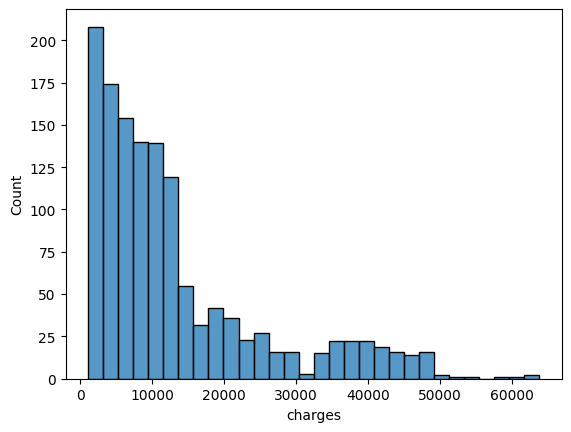

In [4]:
sns.histplot(insurance_df['charges'])

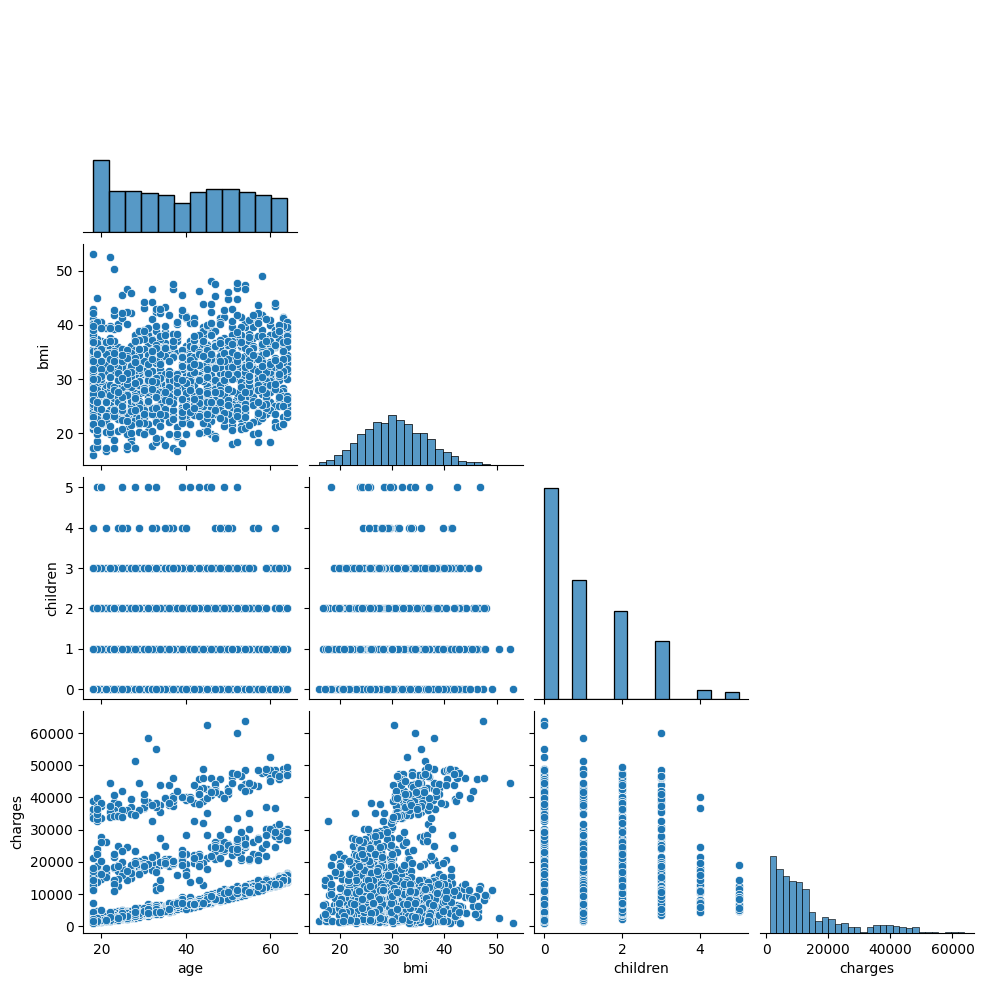

In [5]:
sns.pairplot(insurance_df, corner=True)

In [6]:
# find variable that is most correlated with charges 
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
# the most correlated variable is age therefore we will build our regression model on age
X =sm.add_constant(insurance_df['age'])
y = insurance_df['charges']
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           4.89e-29
Time:                        02:44:31   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# do some predictions
customer_ages=[18,20,24,28,32,36]

X_predict = sm.add_constant(pd.DataFrame({'age':customer_ages}))

X_predict

,const,age
0,1.0,18
1,1.0,20
2,1.0,24
3,1.0,28
4,1.0,32
5,1.0,36


In [ ]:
model.predict(X_predict) # this is stored as pandas series

0     7804.892142
1     8320.337379
2     9351.227854
3    10382.118329
4    11413.008803
5    12443.899278
dtype: float64

In [10]:
# turn pandas series into dataframe
predictions =model.predict(X_predict)
predictions.name = 'predictions'
predictions

0     7804.892142
1     8320.337379
2     9351.227854
3    10382.118329
4    11413.008803
5    12443.899278
Name: predictions, dtype: float64

In [13]:
# from the  original dataframe grab all rows that have those exact ages and 
# compare them to our predictions for those ages to generate mean difference or mean residual
(
    insurance_df
    .query('age in @customer_ages')
    .groupby('age')
    .agg({'charges': 'mean'})
    .reset_index() # to get ages back to dataframe
    .merge(predictions, left_index=True, right_index=True) # merge dataframes
    .assign(
        error =  lambda x: x['predictions'] - x['charges'],
        pct_difference= lambda x: (x['error']/x['charges']) * 100
    )
)

,age,charges,predictions,error,pct_difference
0,18,7086.217556,7804.892142,718.674586,10.141865
1,20,10159.697736,8320.337379,-1839.360357,-18.104479
2,24,10648.015962,9351.227854,-1296.788108,-12.178683
3,28,9069.187564,10382.118329,1312.930764,14.476829
4,32,9220.300291,11413.008803,2192.708513,23.781313
5,36,12204.476138,12443.899278,239.423140,1.961765


<Axes: ylabel='None'>

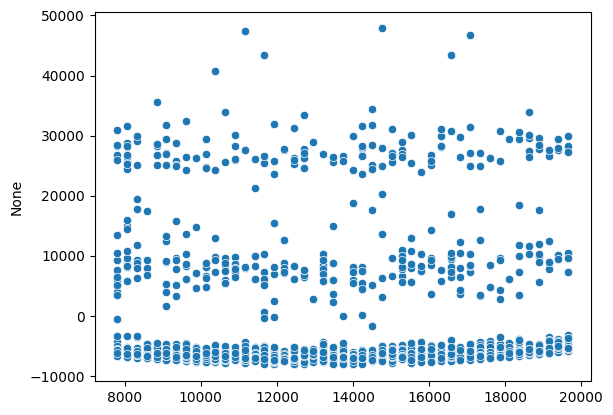

In [14]:
# assess the quality with residuals
sns.scatterplot(x=model.predict(), y =model.resid)